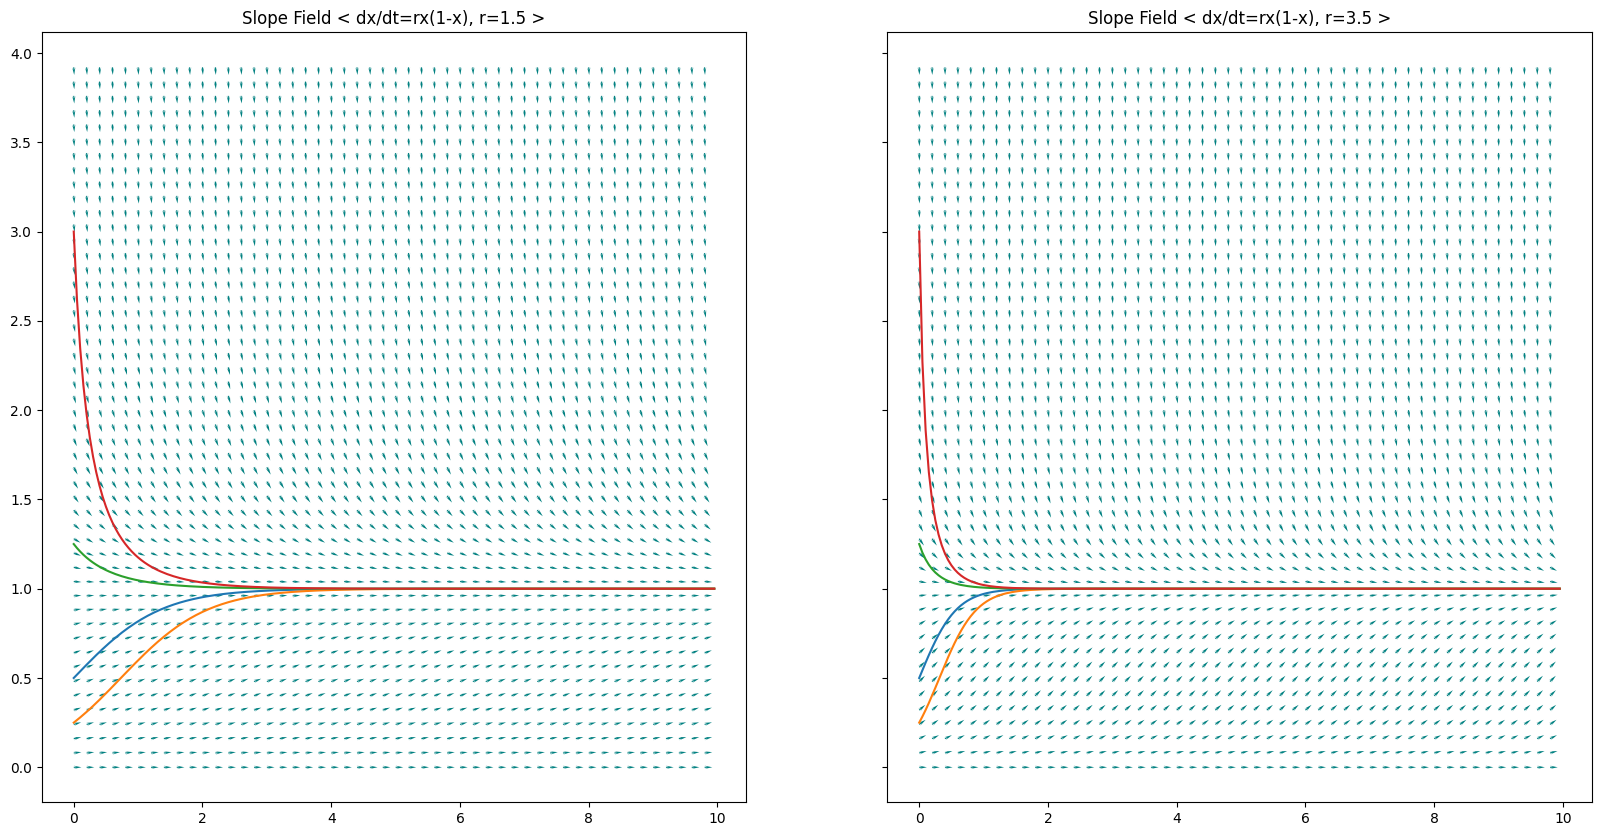

In [7]:
#import numpy as np
from chaotick import runge_kutta_4 as rk4, np as np
from chaotick import logistic_equation
import chaotick

x_interval = [0, 10]
y_interval = [0, 4]
step = 0.05
init_vals = [0.5, 0.25, 1.25, 3]

r1 = 1.5
r2 = 3.5
n = 50
eqn_label = format('rx(1-x), r=%.1f' % r1)
eqn_label2 = format('rx(1-x), r=%.1f' % r2)

x = chaotick.np.arange(x_interval[0], x_interval[1], step)
curves = []
for init_val in init_vals:
    y = rk4(lambda x: logistic_equation(x, r=r1), range=x_interval, step=step, init_val=init_val)
    curves.append([x,y])
curves2 = []
for init_val in init_vals:
    y = rk4(lambda x: logistic_equation(x, r=r2), range=x_interval, step=step, init_val=init_val)
    curves2.append([x,y])

fig, (ax1, ax2) = chaotick.plt.subplots(1, 2, figsize=(20, 10),
                               sharey=True)
chaotick.plot_slope_field(x_interval, y_interval, lambda x: logistic_equation(x, r=r1), ticks=n, ax=ax1, normalized=True, curves=curves, title='Slope Field < dx/dt=%s >' % eqn_label)
chaotick.plot_slope_field(x_interval, y_interval, lambda x: logistic_equation(x, r=r2), ticks=n, ax=ax2, normalized=True, curves=curves2, title='Slope Field < dx/dt=%s >' % eqn_label2)
chaotick.plt.show()

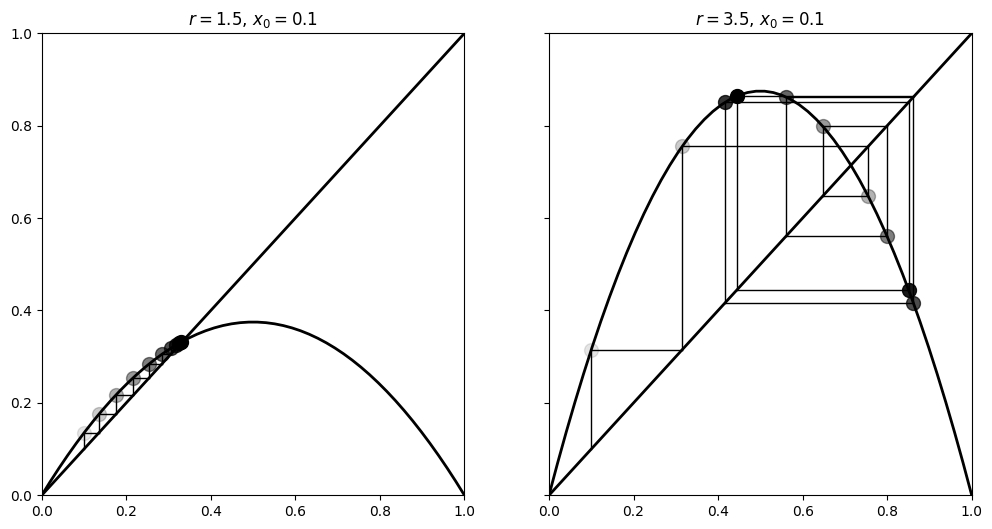

In [ ]:
fig, (ax1, ax2) = chaotick.plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
chaotick.plot_system(r1, .1, 10, ax=ax1)
chaotick.plot_system(r2, .1, 10, ax=ax2)

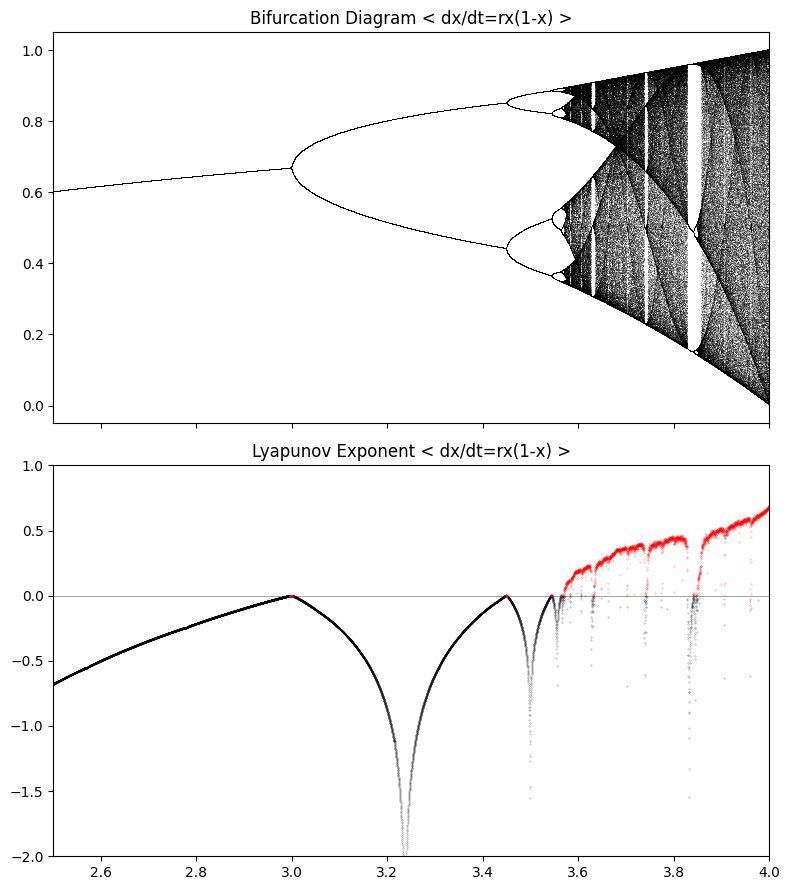

In [10]:
n = 10000
r = np.linspace(2.5, 4.0, n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)
fig, (ax1, ax2) = chaotick.plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic_equation(x, r)
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation Diagram < dx/dt=rx(1-x) >")

ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent, colored red
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)

ax2.set_title("Lyapunov Exponent < dx/dt=rx(1-x) >")
chaotick.plt.tight_layout()